In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
!pip3 install tqdm
from tqdm import tqdm

In [3]:
df = pd.read_csv('Breast_cancer_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
X = df.drop(['diagnosis'],axis=1)
Y = df['diagnosis']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
x_train = x_train.reset_index(drop=True)
x_test  = x_test.reset_index(drop=True )
y_train = pd.DataFrame(y_train.reset_index(drop=True ))
y_test  = pd.DataFrame(y_test.reset_index(drop=True ))

In [7]:
class Naive_Bayes_classifier(object):
    
    def __init__(self):    
        pass
    
    def fit(self, X, Y):
        
        
        self.labels, y_counts = np.unique(Y, return_counts=True)
        self.mu =  np.zeros((len(self.labels), X.shape[1]))
        self.var = np.zeros((len(self.labels), X.shape[1]))
        self.prior =  np.zeros((len(self.labels)))
        
        for label in tqdm(range(len(self.labels))):
            
            self.prior = 1.0 * y_counts/y_counts.sum() #prior for each class
            separated = X.iloc[Y.index[Y.iloc[:,0] == label].tolist()] #groupby class
            self.mu[label] = separated.mean(axis = 0) #mean for each class
            self.var[label] =  np.var(separated, axis = 0) #variance for each class

        return 
            
        
            
    def score(self, Y, Predicted):
        return np.mean(Predicted = Y)

    def predict(self, X):
        
        #likelihood * Prior
        P_X_Given_Class = np.zeros((X.shape[0], len(self.labels)))
        prediction = np.zeros((X.shape[0]))
        
        for i in tqdm(range(len(X))):
            for label in range(len(self.labels)):
                
                #likelihood: P(x|c)
                c = 1.0 /np.sqrt(2.0 * np.pi * (self.var[label] ))
                probs = np.prod(c * np.exp(-1.0 * np.square(np.subtract(X.iloc[i] ,self.mu[label])) / (2.0 * self.var[label] )))
                likelihood = np.prod(c * probs)
                
                #likelihood*Prior: P(x|c)P(c)
                P_X_Given_Class[i, label] = likelihood * self.prior[label]
                
             #Argmax over P(x|c)P(c)
            prediction[i] = np.argmax(P_X_Given_Class[i],  axis=0)
        return prediction
    

In [8]:
model = Naive_Bayes_classifier()
model.fit(x_train , y_train )

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 686.07it/s]


In [9]:
predicted = model.predict(x_test)
print(classification_report(y_test, predicted))
print('confusion_matrix : \n' ,confusion_matrix(y_test, predicted))
print('accuracy : ', (np.mean(predicted == y_test.to_numpy().ravel()))*100)

100%|███████████████████████████████████████| 114/114 [00:00<00:00, 2457.79it/s]

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       0.88      0.97      0.92        63

    accuracy                           0.91       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.91      0.91       114

confusion_matrix : 
 [[43  8]
 [ 2 61]]
accuracy :  91.22807017543859


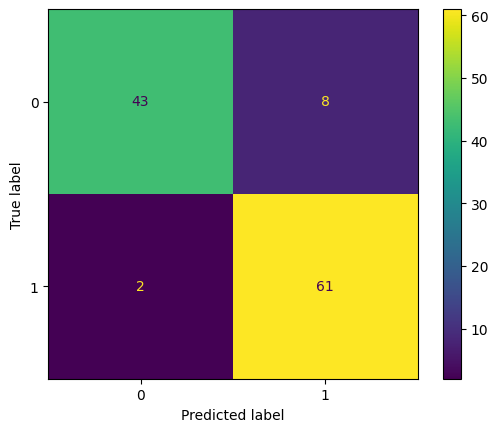

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, predicted, labels=model.labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.labels)
disp.plot()
plt.savefig('c1.png')
plt.show()

In [11]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("Accuracy : ",accuracy_score(y_test.to_numpy(), predicted)*100, '%')
# print("")
# print("Other Metrics : ", classification_report(y_test, predicted, labels=range(0,10)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy :  90.35087719298247 %


In [12]:
print(classification_report(y_test, predicted))
print('confusion_matrix : \n' ,confusion_matrix(y_test, predicted))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(predicted,y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        51
           1       0.87      0.97      0.92        63

    accuracy                           0.90       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114

confusion_matrix : 
 [[42  9]
 [ 2 61]]
accuracy is 0.9035087719298246


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


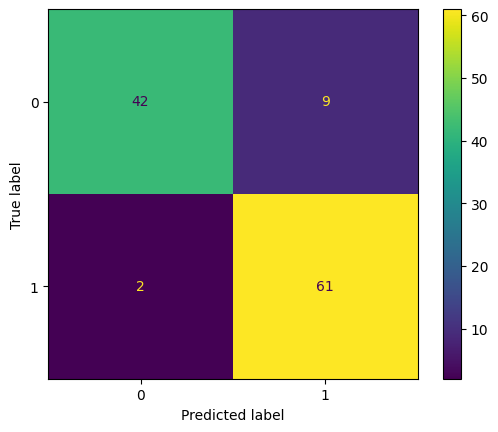

In [13]:
plot_confusion_matrix(model, x_test, y_test)  
plt.savefig('c2.png')
plt.show()